<a href="https://colab.research.google.com/github/sasa0suarez/webscraping_analysis/blob/main/Proyecto_futbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def scrape_page(jornada):
    base_url = 'https://www.bdfutbol.com/en/t/teng2023-24.html?tab=results&jornada='
    url = base_url + str(jornada)

    # Realiza la solicitud HTTP
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        tabla = soup.find('table', {'class': 'taula_estil taula_estil-16'})

        df = pd.read_html(str(tabla))[0]

        return df
    else:
        print("Error al obtener la página:", url)
        return None


all_dfs = []


for jornada in range(22, 0, -1):  # Start from match day 12 and go backwards to match day 1
    print("Scraping Jornada:", jornada)
    df = scrape_page(jornada)
    if df is not None:
        all_dfs.append(df)


final_df = pd.concat(all_dfs, ignore_index=True)

Scraping Jornada: 22
Scraping Jornada: 21
Scraping Jornada: 20
Scraping Jornada: 19
Scraping Jornada: 18
Scraping Jornada: 17
Scraping Jornada: 16
Scraping Jornada: 15
Scraping Jornada: 14
Scraping Jornada: 13
Scraping Jornada: 12
Scraping Jornada: 11
Scraping Jornada: 10
Scraping Jornada: 9
Scraping Jornada: 8
Scraping Jornada: 7
Scraping Jornada: 6
Scraping Jornada: 5
Scraping Jornada: 4
Scraping Jornada: 3
Scraping Jornada: 2
Scraping Jornada: 1


In [3]:
final_df

,Date,Home,Unnamed: 2,Away,Stadium,Referee
0,30/01/2024,Nottingham Forest,12,Arsenal,The City Ground,Simon Hooper
1,30/01/2024,Luton,40,Brighton,Kenilworth Road,Robert Jones
2,30/01/2024,Fulham,0,Everton,Craven Cottage,Tom Bramall
3,30/01/2024,Crystal Palace,32,Sheffield United,Selhurst Park,Tony Harrington
4,30/01/2024,Aston Villa,13,Newcastle,Villa Park,John Brooks
...,...,...,...,...,...,...
215,12/08/2023,Sheffield United,1,Crystal Palace,Bramall Lane,John Brooks
216,12/08/2023,Newcastle,51,Aston Villa,St. James' Park,Andy Madley
217,13/08/2023,Brentford,22,Tottenham,Gtech Community Stadium,Robert Jones
218,13/08/2023,Chelsea,11,Liverpool,Stamford Bridge,Anthony Taylor


In [4]:
# Create new columns for each digit
for i in range(len(final_df)):
    digits = list(str(final_df.at[i, 'Unnamed: 2']))
    if len(digits) == 1:  # Handle single digit case
        if digits[0].isdigit():  # Check if the character is a digit
            digit_concatenated = '0' + digits[0]  # Concatenate '0' with the single digit
            for j, digit in enumerate(digit_concatenated):
                final_df.at[i, f'newcolumn{j+1}'] = int(digit)
    else:
        for j, digit in enumerate(digits):
            if digit.isdigit():  # Check if the character is a digit
                final_df.at[i, f'newcolumn{j+1}'] = int(digit)

# Fill NaN values with 0
final_df.fillna(0, inplace=True)

# Convert the new columns to integers
for col in final_df.columns[-len(digits):]:
    final_df[col] = final_df[col].astype(int)

# Print the DataFrame to verify the changes
print(final_df)

           Date               Home Unnamed: 2              Away  \
0    30/01/2024  Nottingham Forest         12           Arsenal   
1    30/01/2024              Luton         40          Brighton   
2    30/01/2024             Fulham          0           Everton   
3    30/01/2024     Crystal Palace         32  Sheffield United   
4    30/01/2024        Aston Villa         13         Newcastle   
..          ...                ...        ...               ...   
215  12/08/2023   Sheffield United          1    Crystal Palace   
216  12/08/2023          Newcastle         51       Aston Villa   
217  13/08/2023          Brentford         22         Tottenham   
218  13/08/2023            Chelsea         11         Liverpool   
219  14/08/2023  Manchester United         10     Wolverhampton   

                     Stadium          Referee  newcolumn1  newcolumn2  
0            The City Ground     Simon Hooper           1           2  
1            Kenilworth Road     Robert Jones      

In [5]:
final_df

,Date,Home,Unnamed: 2,Away,Stadium,Referee,newcolumn1,newcolumn2
0,30/01/2024,Nottingham Forest,12,Arsenal,The City Ground,Simon Hooper,1,2
1,30/01/2024,Luton,40,Brighton,Kenilworth Road,Robert Jones,4,0
2,30/01/2024,Fulham,0,Everton,Craven Cottage,Tom Bramall,0,0
3,30/01/2024,Crystal Palace,32,Sheffield United,Selhurst Park,Tony Harrington,3,2
4,30/01/2024,Aston Villa,13,Newcastle,Villa Park,John Brooks,1,3
...,...,...,...,...,...,...,...,...
215,12/08/2023,Sheffield United,1,Crystal Palace,Bramall Lane,John Brooks,0,1
216,12/08/2023,Newcastle,51,Aston Villa,St. James' Park,Andy Madley,5,1
217,13/08/2023,Brentford,22,Tottenham,Gtech Community Stadium,Robert Jones,2,2
218,13/08/2023,Chelsea,11,Liverpool,Stamford Bridge,Anthony Taylor,1,1


In [6]:
final_df.rename(columns={'newcolumn1':'Goles_anotados','newcolumn2':'Goles_contra'},inplace=True)

In [7]:
final_df

,Date,Home,Unnamed: 2,Away,Stadium,Referee,Goles_anotados,Goles_contra
0,30/01/2024,Nottingham Forest,12,Arsenal,The City Ground,Simon Hooper,1,2
1,30/01/2024,Luton,40,Brighton,Kenilworth Road,Robert Jones,4,0
2,30/01/2024,Fulham,0,Everton,Craven Cottage,Tom Bramall,0,0
3,30/01/2024,Crystal Palace,32,Sheffield United,Selhurst Park,Tony Harrington,3,2
4,30/01/2024,Aston Villa,13,Newcastle,Villa Park,John Brooks,1,3
...,...,...,...,...,...,...,...,...
215,12/08/2023,Sheffield United,1,Crystal Palace,Bramall Lane,John Brooks,0,1
216,12/08/2023,Newcastle,51,Aston Villa,St. James' Park,Andy Madley,5,1
217,13/08/2023,Brentford,22,Tottenham,Gtech Community Stadium,Robert Jones,2,2
218,13/08/2023,Chelsea,11,Liverpool,Stamford Bridge,Anthony Taylor,1,1


In [8]:
final_df.drop(columns=['Unnamed: 2'],inplace=True)

In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            220 non-null    object
 1   Home            220 non-null    object
 2   Away            220 non-null    object
 3   Stadium         220 non-null    object
 4   Referee         220 non-null    object
 5   Goles_anotados  220 non-null    int64 
 6   Goles_contra    220 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 12.2+ KB


In [10]:
final_df['Date'] = pd.to_datetime(final_df['Date'])

<ipython-input-10-5cf13624599a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  final_df['Date'] = pd.to_datetime(final_df['Date'])


In [11]:
df = final_df

In [12]:
goles_local = df.groupby('Home')['Goles_anotados'].sum().sort_values(ascending=False)
goles_local

Home
Liverpool            30
Aston Villa          30
Manchester City      27
Arsenal              27
Newcastle            25
Tottenham            23
Brighton             22
Brentford            20
Fulham               19
Wolverhampton        19
Chelsea              18
West Ham             18
Luton                17
Manchester United    15
Nottingham Forest    15
Crystal Palace       14
Sheffield United     12
Burnley              11
Everton              11
Bournemouth          11
Name: Goles_anotados, dtype: int64

In [13]:
goles_visitante = df.groupby('Away')['Goles_anotados'].sum().sort_values(ascending=False)
goles_visitante

Away
Sheffield United     28
Fulham               24
Bournemouth          24
Newcastle            23
Brighton             23
Nottingham Forest    23
West Ham             22
Chelsea              21
Luton                21
Burnley              20
Crystal Palace       20
Aston Villa          19
Tottenham            18
Wolverhampton        17
Everton              16
Brentford            16
Manchester United    14
Manchester City      14
Arsenal              11
Liverpool            10
Name: Goles_anotados, dtype: int64

In [14]:
goles_c_local = df.groupby('Home')['Goles_contra'].sum().sort_values(ascending=False)
goles_c_local

Home
Sheffield United     26
Burnley              25
Brentford            20
Wolverhampton        18
Manchester United    18
Luton                17
Nottingham Forest    17
Bournemouth          16
Crystal Palace       16
Tottenham            15
Brighton             14
Chelsea              14
Everton              12
Fulham               12
Aston Villa          11
West Ham             11
Arsenal              10
Newcastle            10
Manchester City      10
Liverpool             9
Name: Goles_contra, dtype: int64

In [15]:
goles_c_visitante = df.groupby('Away')['Goles_contra'].sum().sort_values(ascending=False)
goles_c_visitante

Away
Manchester City      24
Tottenham            24
Liverpool            21
Newcastle            19
Bournemouth          18
West Ham             18
Chelsea              18
Arsenal              17
Brighton             16
Aston Villa          14
Wolverhampton        14
Everton              13
Manchester United    13
Nottingham Forest    12
Luton                11
Crystal Palace       11
Burnley              11
Brentford            11
Fulham                9
Sheffield United      7
Name: Goles_contra, dtype: int64

In [16]:
goles_anotados = pd.concat([goles_local,goles_visitante],axis=1,keys=['goles_local','goles_visitante'])
goles_anotados

,goles_local,goles_visitante
Liverpool,30,10
Aston Villa,30,19
Manchester City,27,14
Arsenal,27,11
Newcastle,25,23
Tottenham,23,18
Brighton,22,23
Brentford,20,16
Fulham,19,24
Wolverhampton,19,17


Text(0.5, 1.0, 'Goles Anotados')

<Figure size 2000x2000 with 0 Axes>

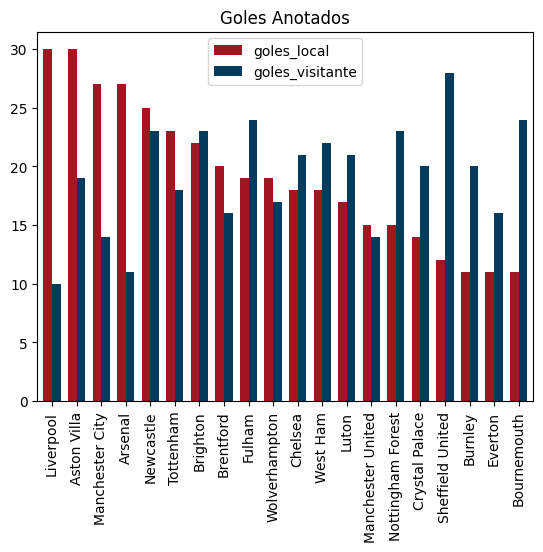

In [17]:
plt.figure(figsize=(20,20))
grafica_goles = goles_anotados.plot(kind='bar',color=['#A31621','#053C5E'], width=0.7)
grafica_goles.set_title('Goles Anotados')

In [18]:
goles_contra = pd.concat([goles_c_local,goles_c_visitante],axis=1,keys=['goles_c_local','goles_c_visitante'])
goles_contra

,goles_c_local,goles_c_visitante
Sheffield United,26,7
Burnley,25,11
Brentford,20,11
Wolverhampton,18,14
Manchester United,18,13
Luton,17,11
Nottingham Forest,17,12
Bournemouth,16,18
Crystal Palace,16,11
Tottenham,15,24


Text(0.5, 1.0, 'Grafica goles en contra')

<Figure size 2000x2000 with 0 Axes>

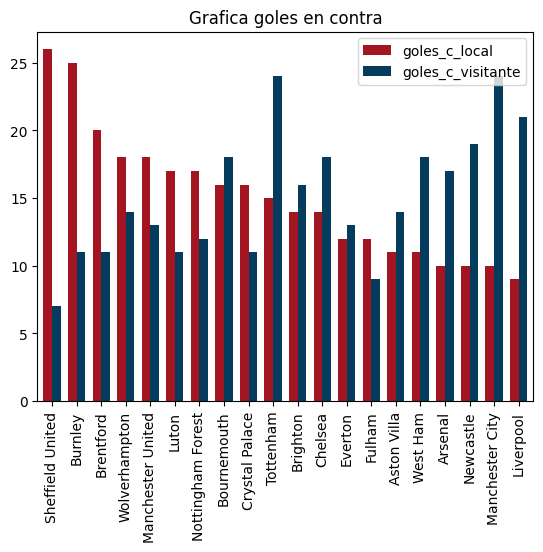

In [19]:
plt.figure(figsize=(20,20))
grafica_goles_c = goles_contra.plot(kind='bar', color=['#A31621','#053C5E'],width=0.7)
grafica_goles_c.set_title('Grafica goles en contra')


In [20]:
sorted = df.sort_values(ascending=True, by='Date')
sorted

,Date,Home,Away,Stadium,Referee,Goles_anotados,Goles_contra
180,2023-01-09,Luton,West Ham,Kenilworth Road,Paul Tierney,1,2
158,2023-01-10,Nottingham Forest,Brentford,The City Ground,Paul Tierney,1,1
186,2023-02-09,Brighton,Newcastle,The American Express Community Stadium,Stuart Attwell,3,1
185,2023-02-09,Manchester City,Fulham,Etihad Stadium,Michael Oliver,5,1
184,2023-02-09,Chelsea,Nottingham Forest,Stamford Bridge,Tim Robinson,0,1
...,...,...,...,...,...,...,...
7,2024-01-31,Liverpool,Chelsea,Anfield,Paul Tierney,4,1
6,2024-01-31,Manchester City,Burnley,Etihad Stadium,Samuel Barrott,3,1
5,2024-01-31,Tottenham,Brentford,Tottenham Hotspur Stadium,David Coote,3,2
29,2024-02-01,West Ham,Brighton,London Stadium,Samuel Barrott,0,0


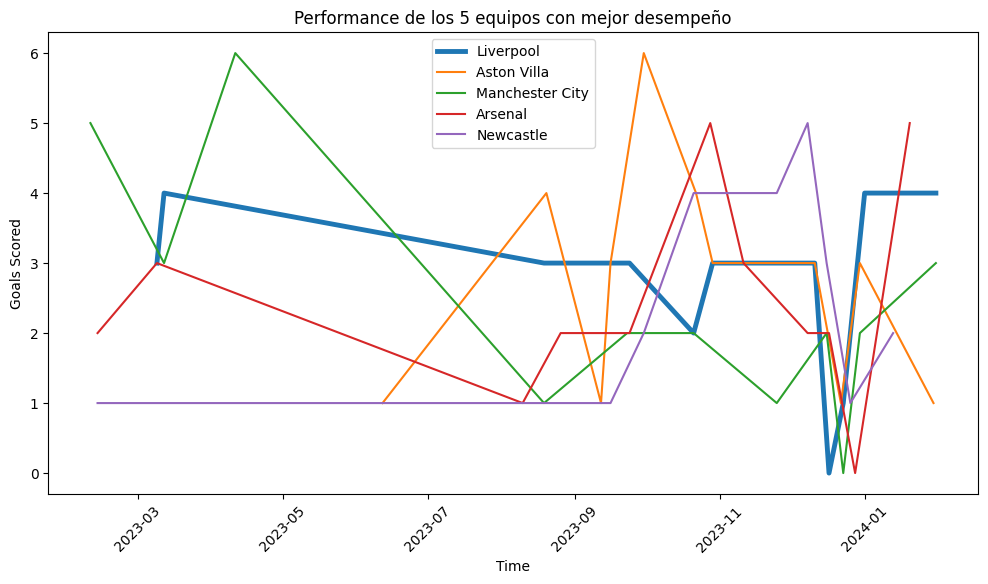

In [21]:
sorted_data = sorted[['Date', 'Home', 'Goles_anotados']]

# Agrupar la data por local y goles anotados
total_goals = sorted_data.groupby('Home')['Goles_anotados'].sum()

# prdernar los equipos de mejor apeor performance y escoger los 5 mejores
top_5_teams = total_goals.sort_values(ascending=False).head(5)

# Del dataFrame original filtrarlos por los 5 mejores equipos
sorted_data_top_5 = sorted_data[sorted_data['Home'].isin(top_5_teams.index)]

plt.figure(figsize=(12, 6))
for team in top_5_teams.index:
    team_data = sorted_data_top_5[sorted_data_top_5['Home'] == team]
    if team == top_5_teams.index[0]:  # Hresaltar el equipo con mejor desempeño
        plt.plot(team_data['Date'], team_data['Goles_anotados'], label=team, linewidth=3.5)  # ajustar el grosor
    else:
        plt.plot(team_data['Date'], team_data['Goles_anotados'], label=team)

# configurar aspectosde etiqueta
plt.xlabel('Time')
plt.ylabel('Goals Scored')
plt.title('Performance de los 5 equipos con mejor desempeño')

# añadir leyenda
plt.legend()

# rotar los axis
plt.xticks(rotation=45)

# mostrar grafico
plt.show()

In [22]:
df['Diferencia_goles'] = df['Goles_anotados']-df['Goles_contra']
df.sample(5)

,Date,Home,Away,Stadium,Referee,Goles_anotados,Goles_contra,Diferencia_goles
71,2023-05-12,Wolverhampton,Burnley,Molineux Stadium,Jarred Gillett,1,0,1
98,2023-11-26,Tottenham,Aston Villa,Tottenham Hotspur Stadium,Robert Jones,1,2,-1
69,2023-10-12,Tottenham,Newcastle,Tottenham Hotspur Stadium,Chris Kavanagh,4,1,3
4,2024-01-30,Aston Villa,Newcastle,Villa Park,John Brooks,1,3,-2
0,2024-01-30,Nottingham Forest,Arsenal,The City Ground,Simon Hooper,1,2,-1


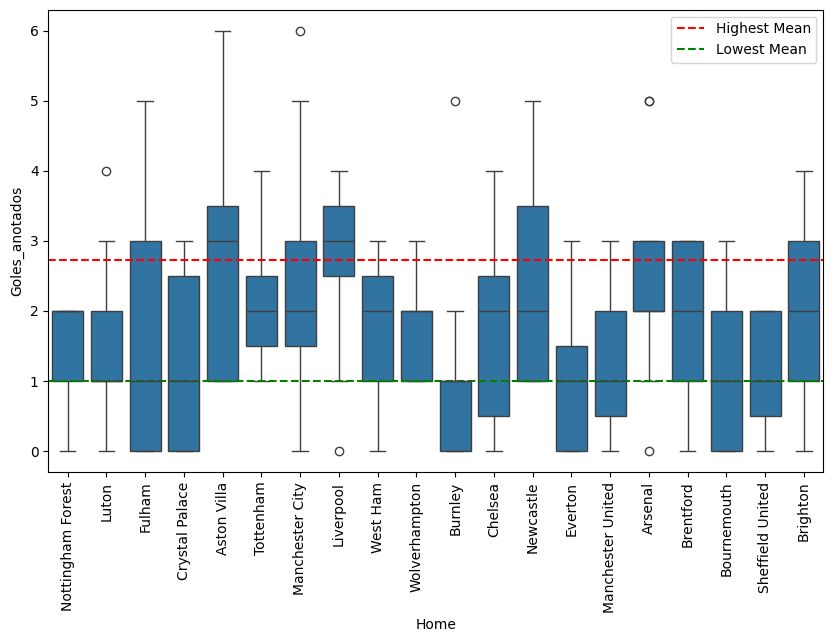

In [23]:
# Calculate the highest and lowest mean
highest_mean = df.groupby('Home')['Goles_anotados'].mean().max()
lowest_mean = df.groupby('Home')['Goles_anotados'].mean().min()

# Create the boxplot
plt.figure(figsize=(10, 6))
grafica = sns.boxplot(x='Home', y='Goles_anotados', data=df)
grafica.tick_params(axis='x', rotation=90)

# Add horizontal lines for the highest and lowest mean
plt.axhline(y=highest_mean, color='r', linestyle='--', label='Highest Mean')
plt.axhline(y=lowest_mean, color='g', linestyle='--', label='Lowest Mean')

# Show legend
plt.legend()

# Show plot
plt.show()

In [24]:
liverpool = df[df['Home'] == 'Liverpool']
liverpool

,Date,Home,Away,Stadium,Referee,Goles_anotados,Goles_contra,Diferencia_goles
7,2024-01-31,Liverpool,Chelsea,Anfield,Paul Tierney,4,1,3
28,2024-01-01,Liverpool,Newcastle,Anfield,Anthony Taylor,4,2,2
43,2023-12-23,Liverpool,Arsenal,Anfield,Chris Kavanagh,1,1,0
58,2023-12-17,Liverpool,Manchester United,Anfield,Michael Oliver,0,0,0
87,2023-03-12,Liverpool,Fulham,Anfield,Stuart Attwell,4,3,1
108,2023-12-11,Liverpool,Brentford,Anfield,Paul Tierney,3,0,3
127,2023-10-29,Liverpool,Nottingham Forest,Anfield,Chris Kavanagh,3,0,3
133,2023-10-21,Liverpool,Everton,Anfield,Craig Pawson,2,0,2
168,2023-09-24,Liverpool,West Ham,Anfield,Chris Kavanagh,3,1,2
188,2023-03-09,Liverpool,Aston Villa,Anfield,Simon Hooper,3,0,3


<Axes: xlabel='Date'>

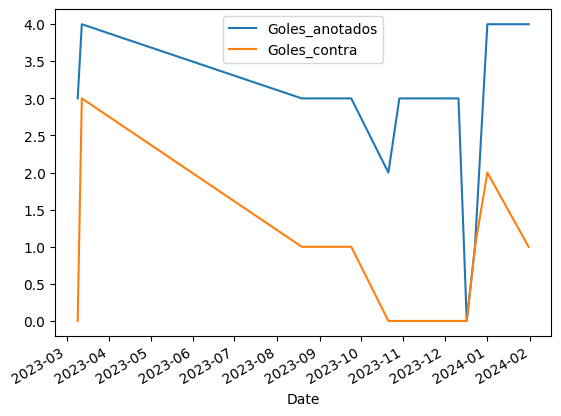

In [25]:
liverpool.groupby('Date')[['Goles_anotados','Goles_contra']].sum().plot(kind='line')

<function matplotlib.pyplot.show(close=None, block=None)>

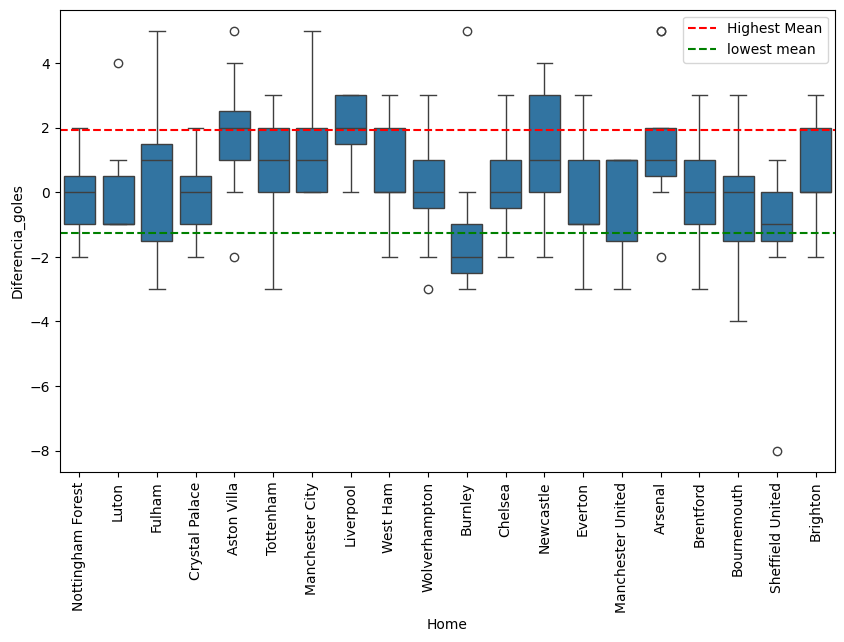

In [26]:
maximo = df.groupby('Home')['Diferencia_goles'].mean().max()
minimo = df.groupby('Home')['Diferencia_goles'].mean().min()
mean = df.groupby('Home')['Diferencia_goles'].mean()

plt.figure(figsize=(10, 6))
grafica = sns.boxplot(x='Home', y='Diferencia_goles', data=df)
grafica.tick_params(axis='x', rotation=90)

plt.axhline(y=maximo, color='r',linestyle='--',label='Highest Mean')
plt.axhline(y=minimo, color='g',linestyle='--',label='lowest mean')

plt.legend()

plt.show